In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import zscore, pointbiserialr
from sklearn.preprocessing import MinMaxScaler

In [68]:
file_path = "heart_attack_prediction_dataset.csv"
df = pd.read_csv(file_path)

# For showing all columns
pd.set_option('display.max_columns', None)

df

Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  \
0       BMW7812   67    Male          208         158/88          72   
1       CZE1114   21    Male          389         165/93          98   
2       BNI9906   21  Female          324         174/99          72   
3       JLN3497   84    Male          383        163/100          73   
4       GFO8847   66    Male          318          91/88          93   
...         ...  ...     ...          ...            ...         ...   
8758    MSV9918   60    Male          121          94/76          61   
8759    QSV6764   28  Female          120        157/102          73   
8760    XKA5925   47    Male          250         161/75         105   
8761    EPE6801   36    Male          178         119/67          60   
8762    ZWN9666   25  Female          356         138/67          75   

      Diabetes  Family History  Smoking  Obesity  Alcohol Consumption  \
0            0               0        1        0                    0   
1            1               1        1        1                    1   
2            1               0        0        0                    0   
3            1               1        1        0                    1   
4            1               1        1        1                    0   
...        ...             ...      ...      ...                  ...   
8758         1               1        1        0                    1   
8759         1               0        0        1                    0   
8760         0               1        1        1                    1   
8761         1               0        1        0                    0   
8762         1               1        0        0                    1   

      Exercise Hours Per Week       Diet  Previous Heart Problems  \
0                    4.168189    Average                        0   
1                    1.813242  Unhealthy                        1   
2                    2.078353    Healthy                        1   
3                    9.828130    Average                        1   
4                    5.804299  Unhealthy                        1   
...                       ...        ...                      ...   
8758                 7.917342    Healthy                        1   
8759                16.558426    Healthy                        0   
8760                 3.148438    Average                        1   
8761                 3.789950  Unhealthy                        1   
8762                18.081748    Healthy                        0   

      Medication Use  Stress Level  Sedentary Hours Per Day  Income  \
0                  0             9                 6.615001  261404   
1                  0             1                 4.963459  285768   
2                  1             9                 9.463426  235282   
3                  0             9                 7.648981  125640   
4                  0             6                 1.514821  160555   
...              ...           ...                      ...     ...   
8758               1             8                10.806373  235420   
8759               0             8                 3.833038  217881   
8760               0             5                 2.375214   36998   
8761               1             5                 0.029104  209943   
8762               0             8                 9.005234  247338   

            BMI  Triglycerides  Physical Activity Days Per Week  \
0     31.251233            286                                0   
1     27.194973            235                                1   
2     28.176571            587                                4   
3     36.464704            378                                3   
4     21.809144            231                                1   
...         ...            ...                              ...   
8758  19.655895             67                                7   
8759  23.993866            617               

## Visualization

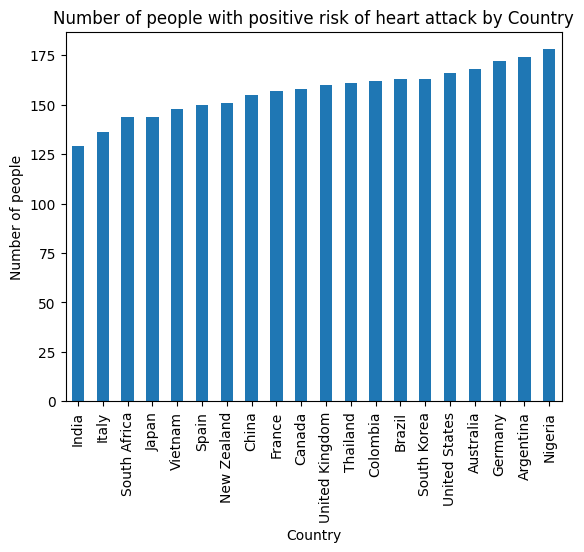

In [69]:
# Assuming you have a dataframe called 'data' with a 'country' column and a 'target_panel' column
ha_vs_country = df.groupby('Country')['Heart Attack Risk'].sum().sort_values()
ha_vs_country.plot(kind='bar')
plt.title('Number of people with positive risk of heart attack by Country')
plt.xlabel('Country')
plt.ylabel('Number of people')
plt.show()

Top fifth countries are

Negeria

Argentina

Germany

Australia

United States

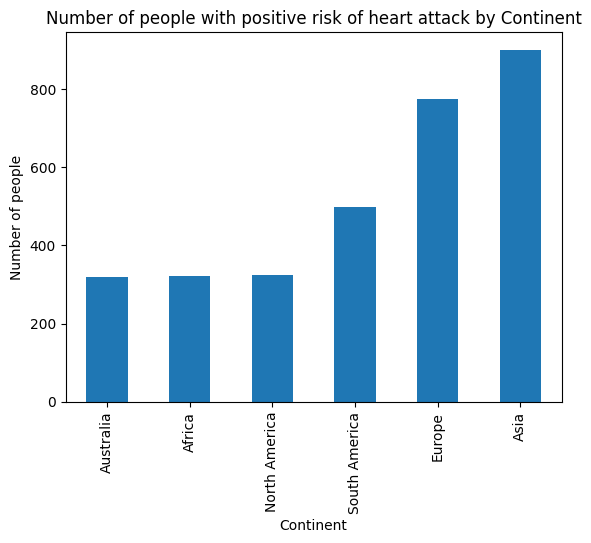

In [70]:
# Assuming you have a dataframe called 'data' with a 'country' column and a 'target_panel' column
ha_vs_country = df.groupby('Continent')['Heart Attack Risk'].sum().sort_values()
ha_vs_country.plot(kind='bar')
plt.title('Number of people with positive risk of heart attack by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of people')
plt.show()

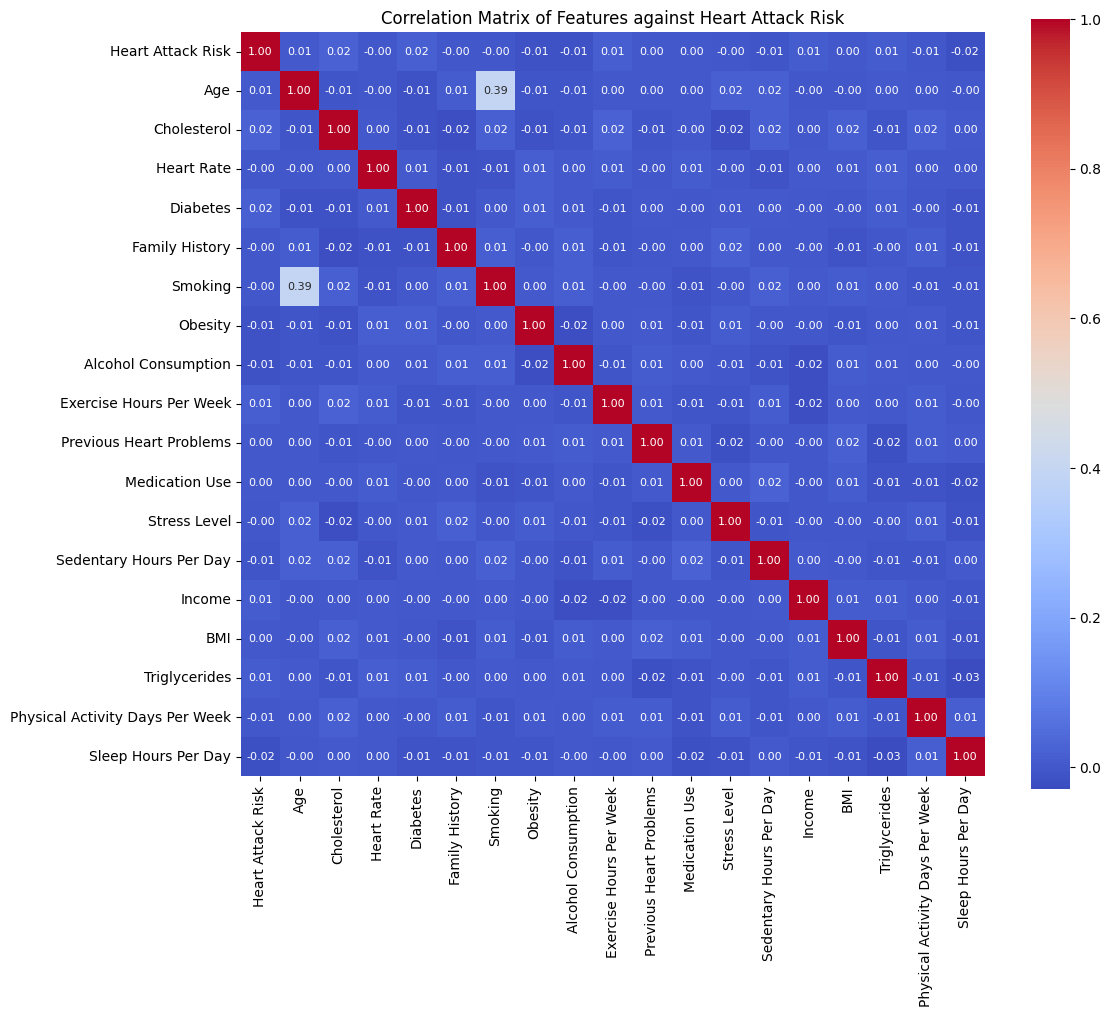

In [71]:
# Move heart attack column to first column
cols = df.columns.tolist()
cols = ['Heart Attack Risk'] + [col for col in cols if col != 'Heart Attack Risk']
temp_encoded_df = df[cols]

# calculate the correlations
correlation_matrix = temp_encoded_df.corr(numeric_only=True)
correlation_target = correlation_matrix['Heart Attack Risk'].sort_values(ascending=False)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 8, "ha": 'center', "va": 'center'}, fmt='.2f', square = True)
plt.title('Correlation Matrix of Features against Heart Attack Risk')
plt.show()

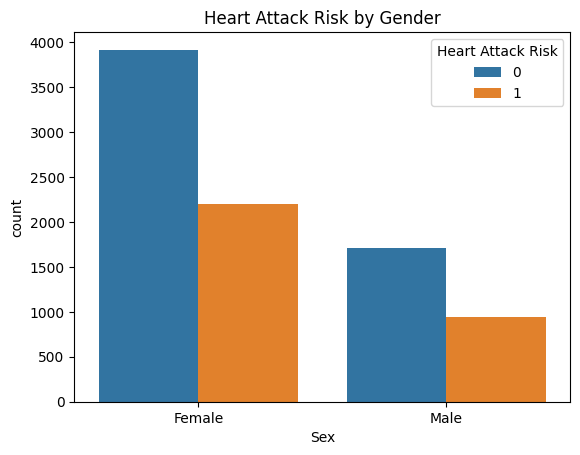

In [72]:
sns.countplot(x='Sex', hue='Heart Attack Risk', data=df)
plt.title('Heart Attack Risk by Gender')
plt.xticks([0, 1], ['Female', 'Male'])

plt.show()

Number of female patients are less, so we must consider ratio

In [73]:
## finding how many female and male patients in the dataset
gender_group_number = df.groupby('Sex')["Patient ID"].count()
gender_group_number

Sex
Female    2652
Male      6111
Name: Patient ID, dtype: int64

In [74]:
# find number of male and female with heart attack risk separately
gender_group_ha_risk = df.groupby('Sex')['Heart Attack Risk'].sum()
gender_group_ha_risk

Sex
Female     944
Male      2195
Name: Heart Attack Risk, dtype: int64

In [75]:
# find the ratio of postive heart attack risk to all by gender
gender_group_number / gender_group_ha_risk

Sex
Female    2.809322
Male      2.784055
dtype: float64

It shows that heart attack risk is more visible in female of this dataset

In [76]:
## check type of data of columns
df.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [77]:
# distinguish binary features
binary_features = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'int64']
# change type to boolean
df[binary_features] = df[binary_features].astype(bool)

In [78]:
df.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                              bool
Family History                        bool
Smoking                               bool
Obesity                               bool
Alcohol Consumption                   bool
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems               bool
Medication Use                        bool
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

#### plots binary features against heart attack risk


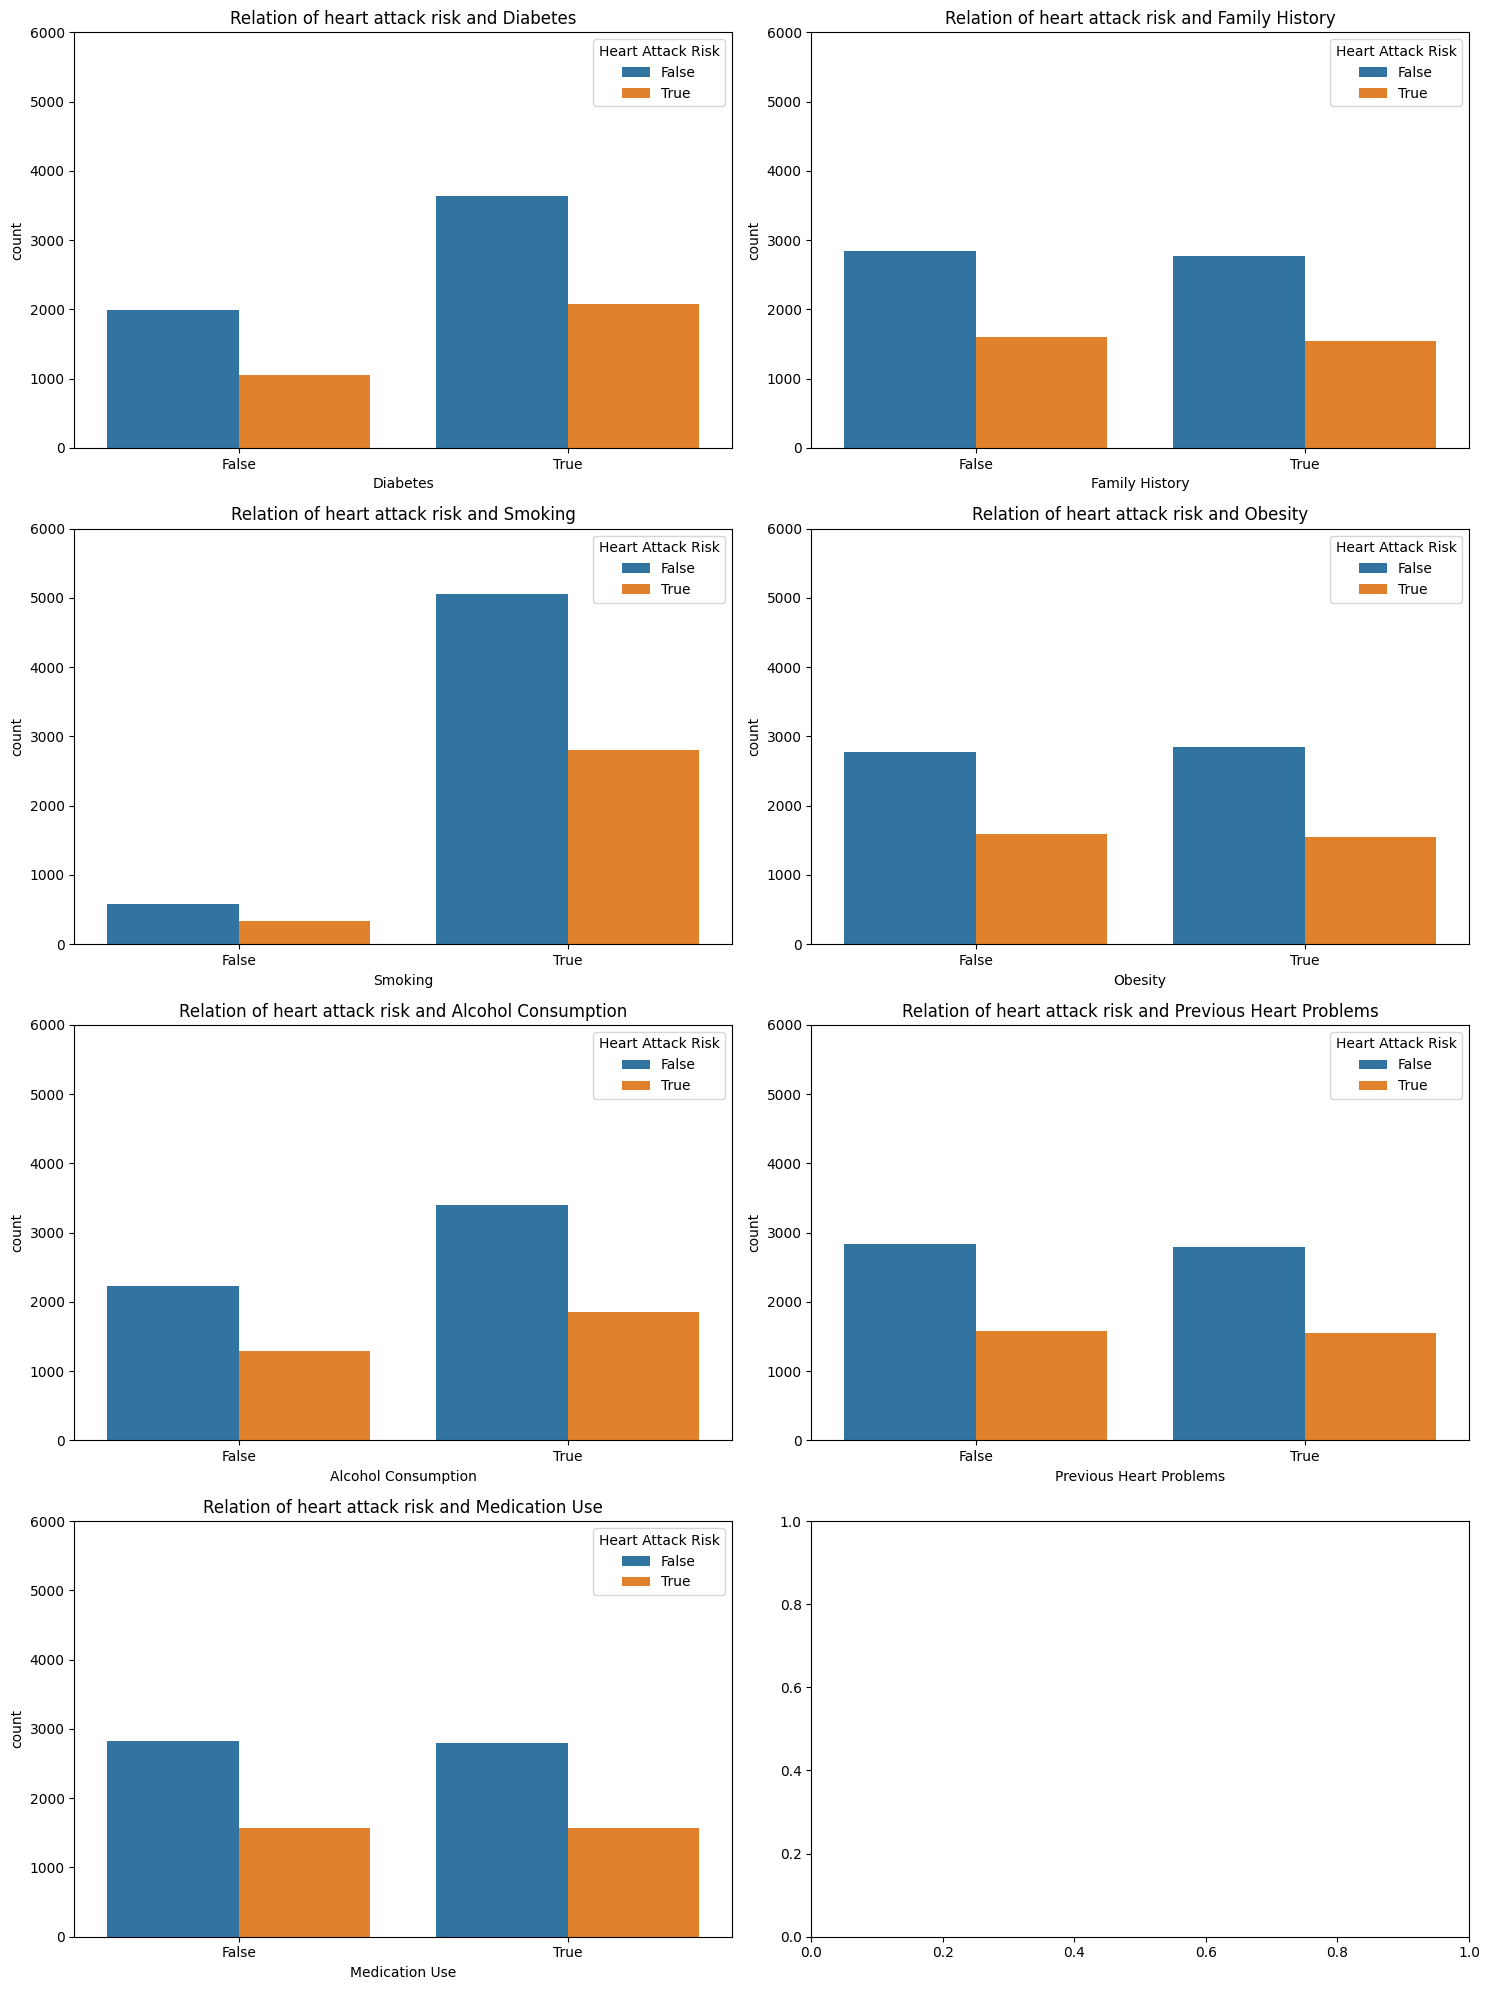

In [79]:
binary_columns = df.select_dtypes(include=['bool']).columns

n_columns = 2
n_features = len(binary_columns) 
n_rows = int(np.ceil(n_features / n_columns)) 

fig, axes = plt.subplots(n_rows, n_columns, figsize=(15, 5*n_rows))
for i, feature in enumerate(binary_columns):
    if feature != 'Heart Attack Risk':
        row_index = i // n_columns  
        col_index = i % n_columns  
        ax = axes[row_index, col_index] if n_rows > 1 else axes[col_index]  # Handle single row case
        sns.countplot(x=feature, hue='Heart Attack Risk', data=df, ax=ax)
        ax.set_ylim(0, 6000)  # Set y-axis limit
        ax.set_title(f'Relation of heart attack risk and {feature}')
plt.tight_layout()
plt.show()

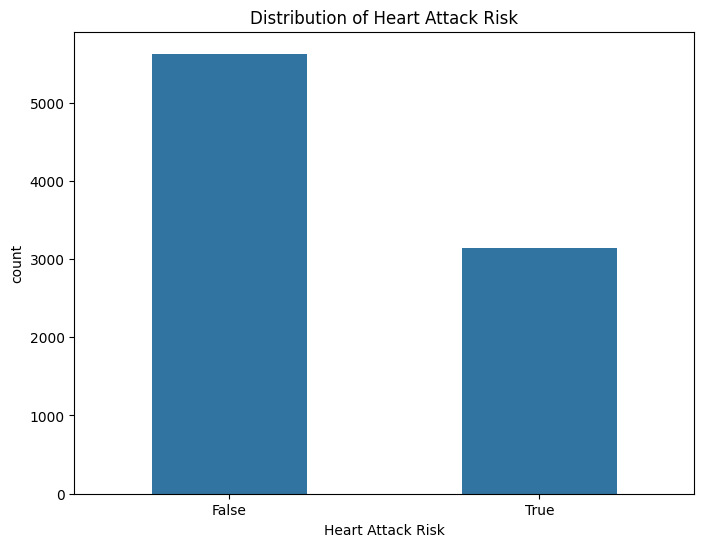

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Heart Attack Risk', data=df, width = 0.5)
plt.title('Distribution of Heart Attack Risk')
plt.show()

## Missing Values 

**Find missing values per each feature**:

In [81]:
missing_values = df.isnull().sum()
print(missing_values)

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


**No missing value exists  in this dataset**

The blood pressure consists of 2 parts, 'Systolic' and 'Diastolic'.

The dataset recorded them together and it is known as a 'object' variable.

To make it numeric we splitted in 2 features:


In [82]:
df['Systolic_BP'] = df['Blood Pressure'].apply(lambda x: int(x.split('/')[0]))
df['Diastolic_BP'] = df['Blood Pressure'].apply(lambda x: int(x.split('/')[1]))

# Drop the'Blood Pressure' column
df.drop('Blood Pressure', axis=1, inplace=True)

As it showed above even boolean features are saved as int64, to easily seperate them we find binary features and change their type to bool

In [165]:
numeric_columns = df.select_dtypes(include=['int64','float64']).columns
binary_columns = df.select_dtypes(include=['bool']).columns
numeric_columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week',
       'Diet', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI',
       'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Systolic_BP', 'Diastolic_BP'],
      dtype='object')

['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Diet', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Systolic_BP', 'Diastolic_BP', 'Heart Attack Risk']


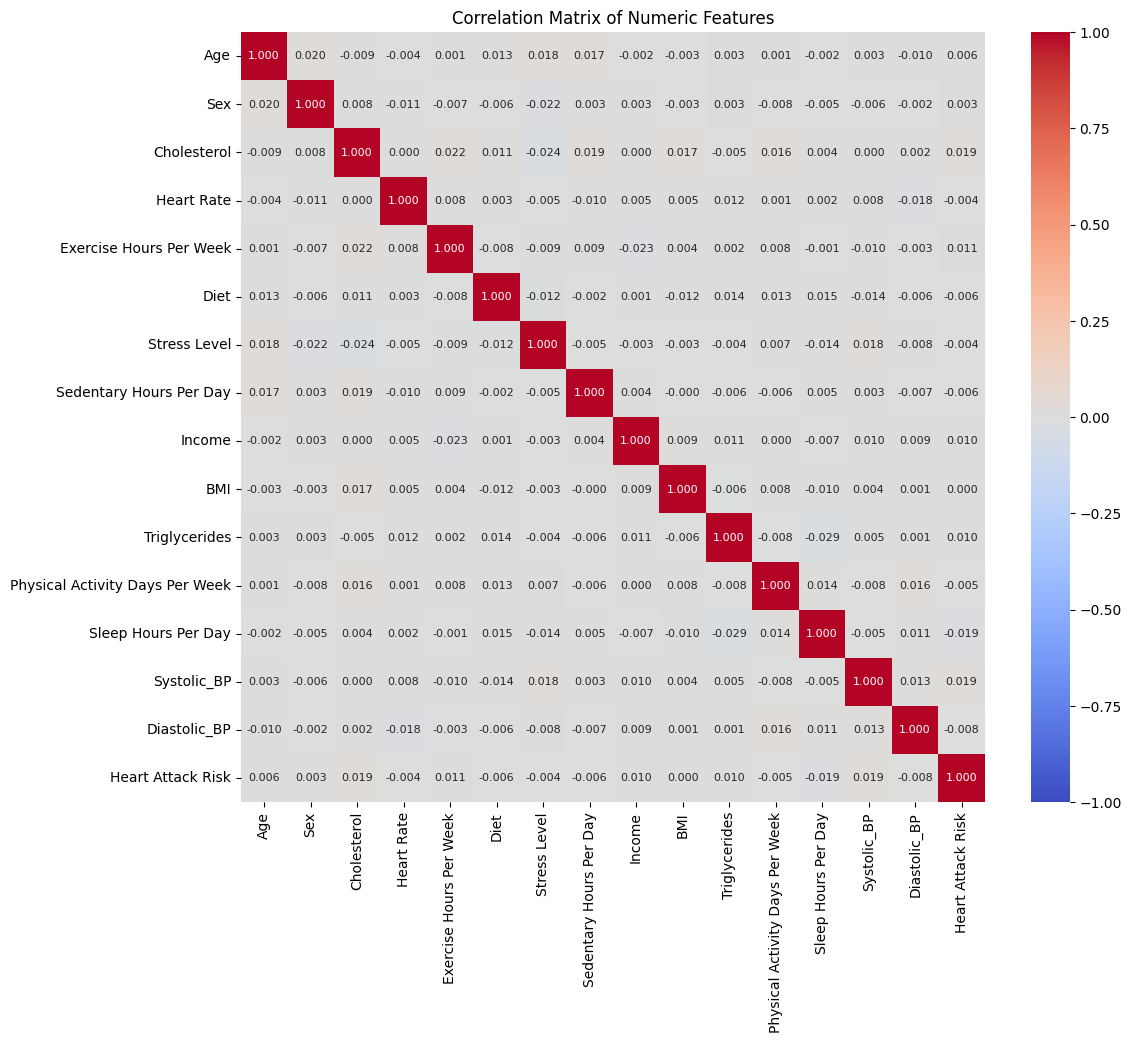

In [166]:
# calculate the correlations
numeric_vs_HAR = list(numeric_columns)
numeric_vs_HAR.append('Heart Attack Risk')
print(numeric_vs_HAR)
correlation_matrix = df[numeric_vs_HAR].corr(method = "pearson")
correlation_target = correlation_matrix#['Heart Attack Risk'].sort_values(ascending=False)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, annot_kws={"size": 8, "ha": 'center', "va": 'center'}, fmt='.3f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

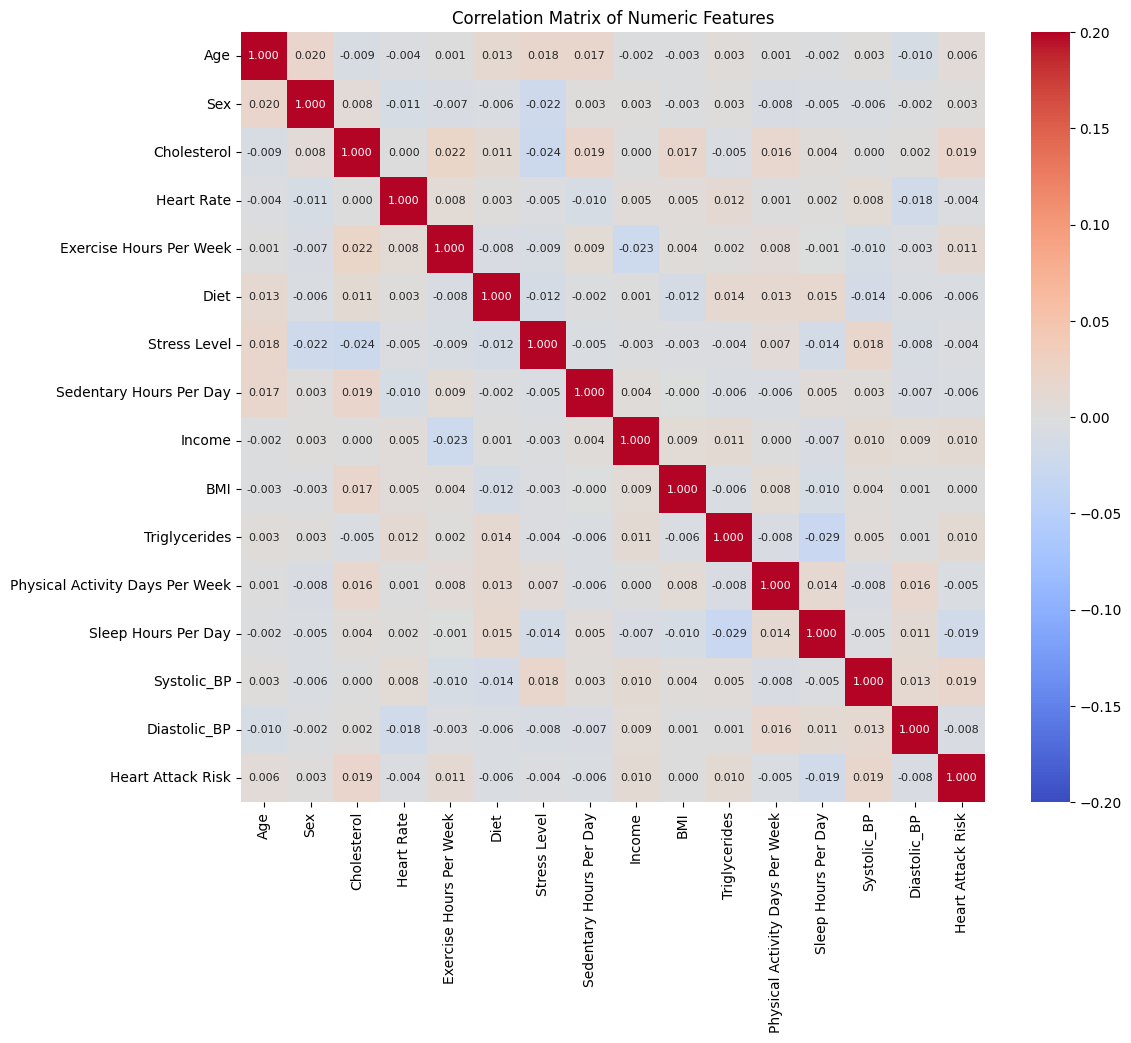

In [167]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-0.2, vmax = 0.2, annot_kws={"size": 8, "ha": 'center', "va": 'center'}, fmt='.3f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

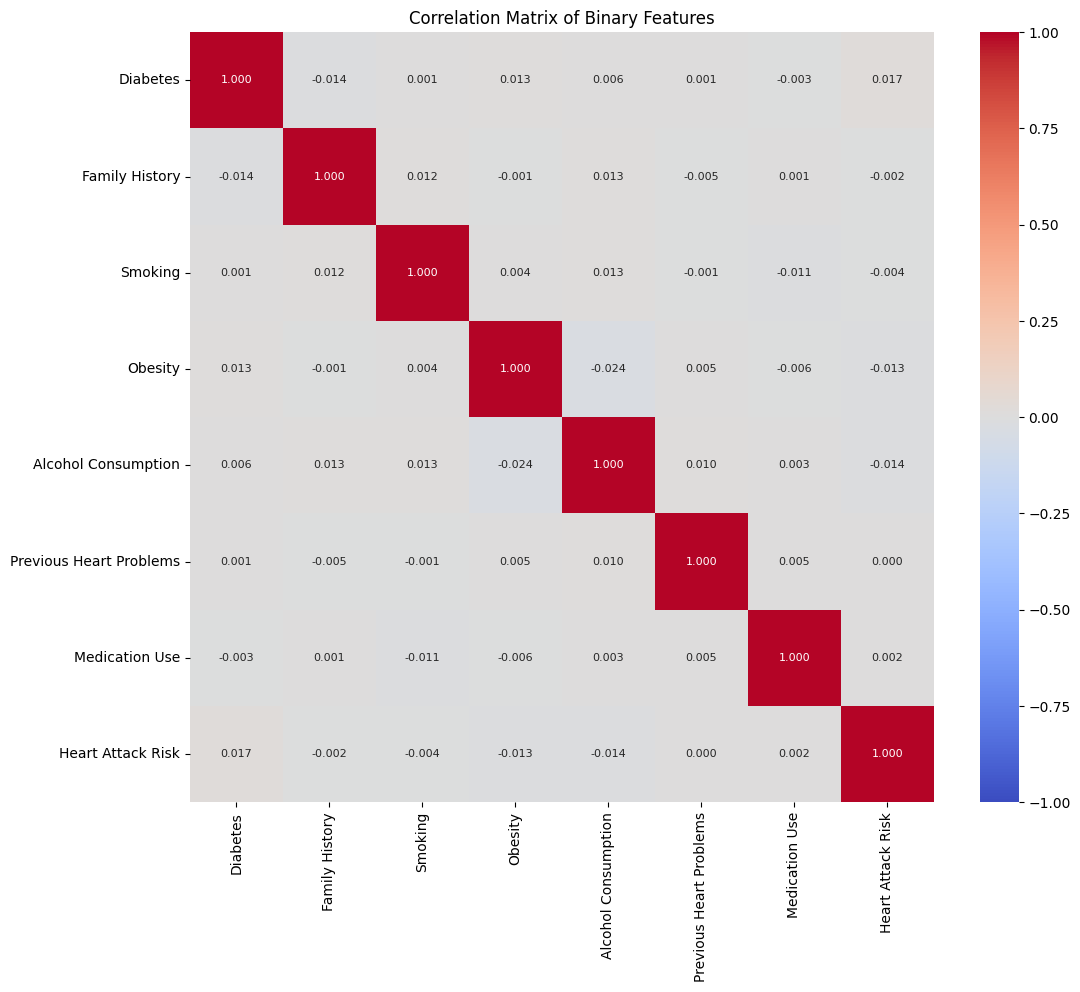

In [175]:
# calculate the correlations
correlation_matrix = df[binary_columns].corr(method = "pearson")
correlation_target = correlation_matrix#['Heart Attack Risk'].sort_values(ascending=False)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, annot_kws={"size": 8, "ha": 'center', "va": 'center'}, fmt='.3f')
plt.title('Correlation Matrix of Binary Features')
plt.show()

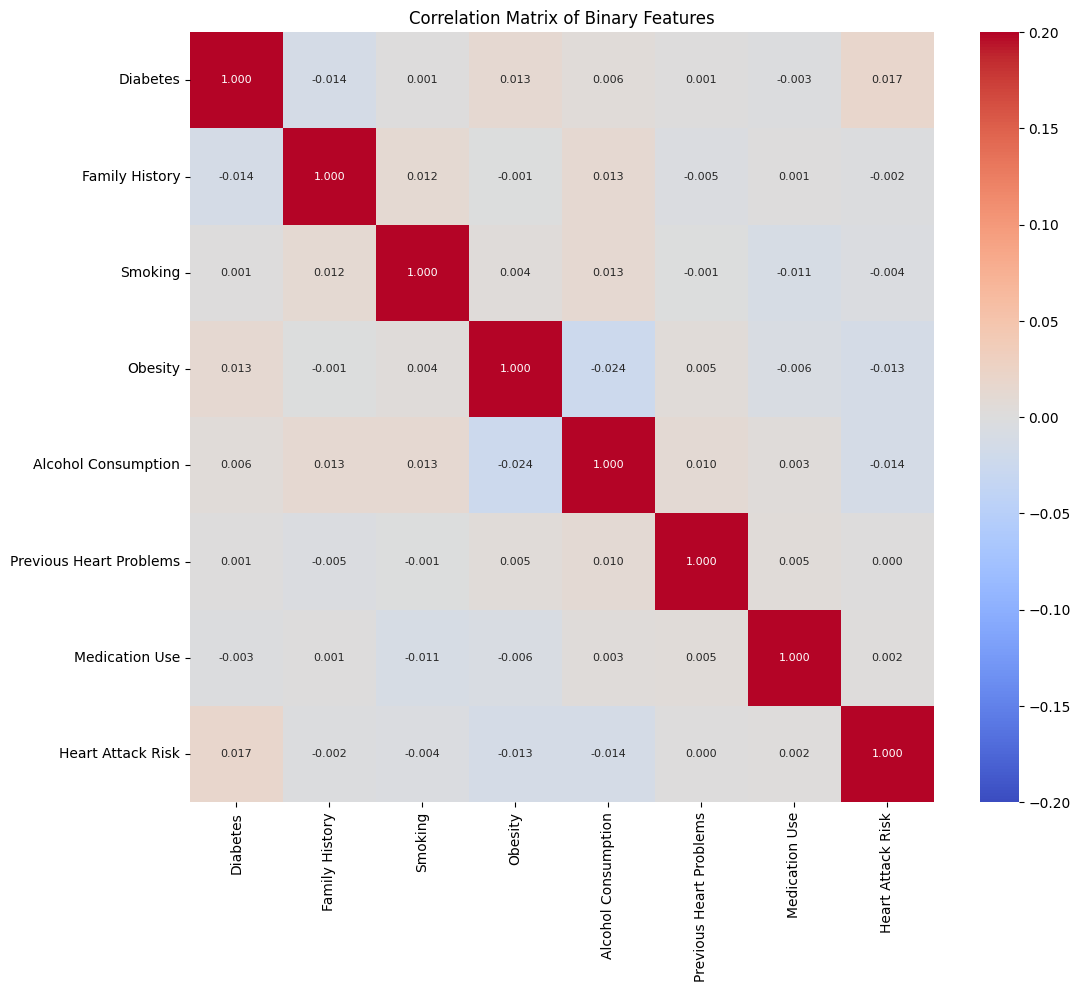

In [176]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-0.2, vmax=0.2, annot_kws={"size": 8, "ha": 'center', "va": 'center'}, fmt='.3f')
plt.title('Correlation Matrix of Binary Features')
plt.show()

## Normalization

#### In order to find which features need normalizations, different factors must be checked
1 - The model where going to use (models base on distance is sensitive to the scale of data)

2 - Data Distribution

We are not aware of model at this time so we just check Distribution

In [86]:
numeric_columns

Index(['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week',
       'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI',
       'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Systolic_BP', 'Diastolic_BP'],
      dtype='object')

**Plots**

In [87]:
def histogram_plot(data, columns):
    for column in columns:
        plt.figure()
        sns.histplot(data[column], kde=False, bins=20)  # Histogram without kernel density estimate
        plt.title('Histogram of ' + column)
    plt.show()

In [88]:
def box_plot(data, columns):
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 4 * len(columns)))
    fig.subplots_adjust(hspace=0.5)
    
    # Plot boxplots for each numeric feature
    for i, column in enumerate(columns):
        sns.boxplot(ax=axes[i], x=df[column], color='skyblue', showfliers=True)
        axes[i].set_title(f'Boxplot of {column}')
    plt.show()

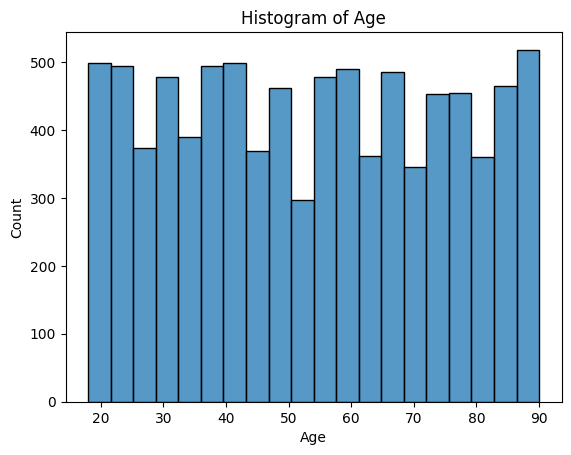

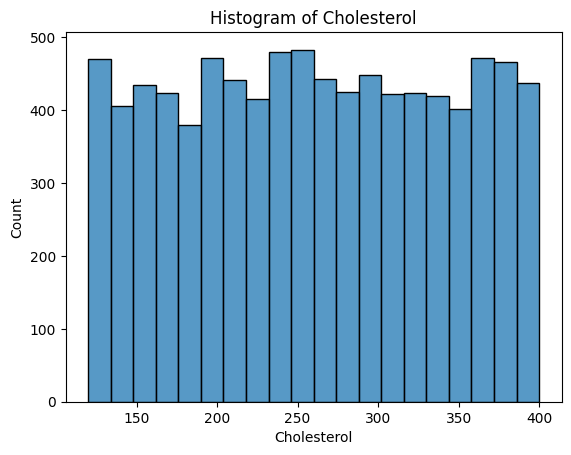

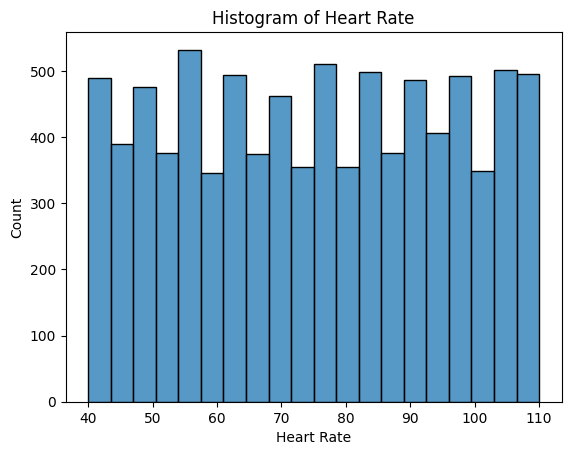

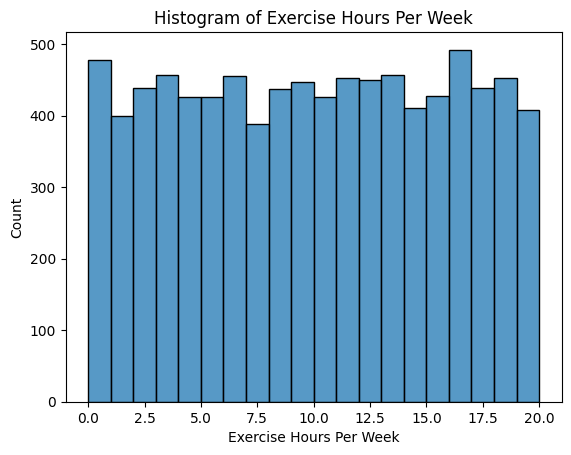

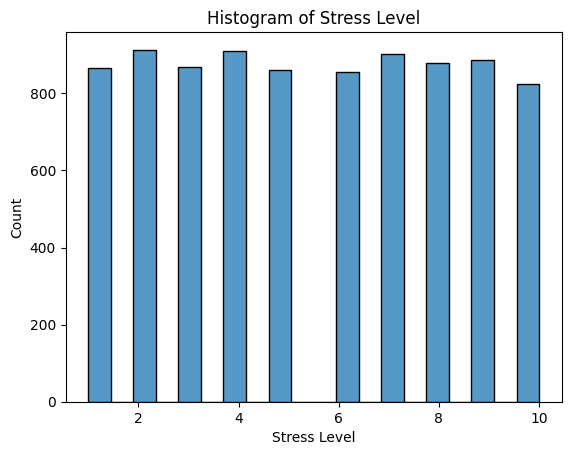

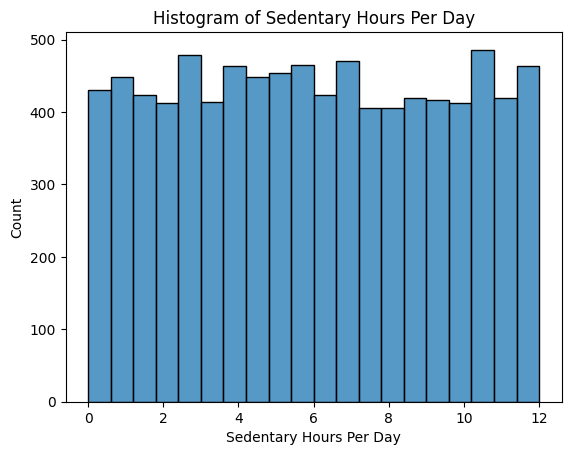

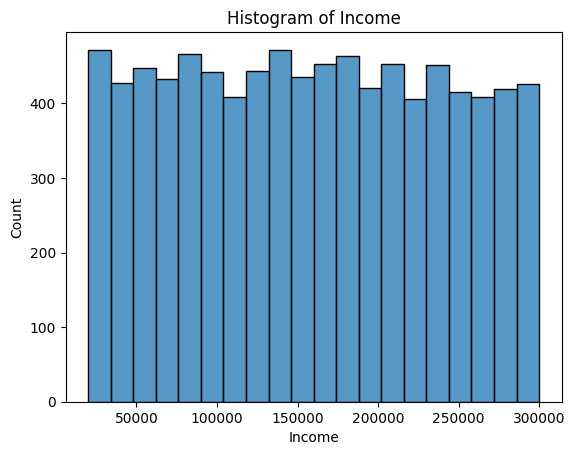

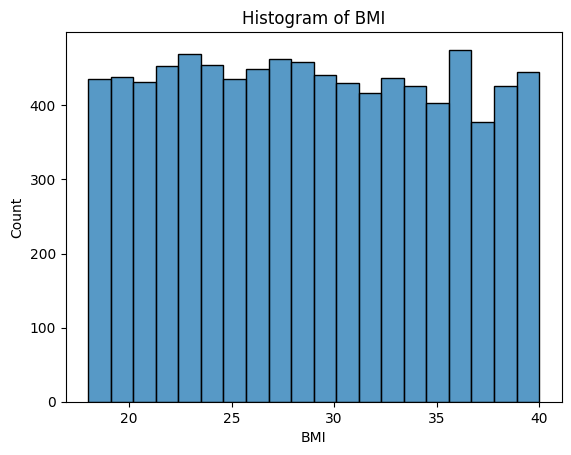

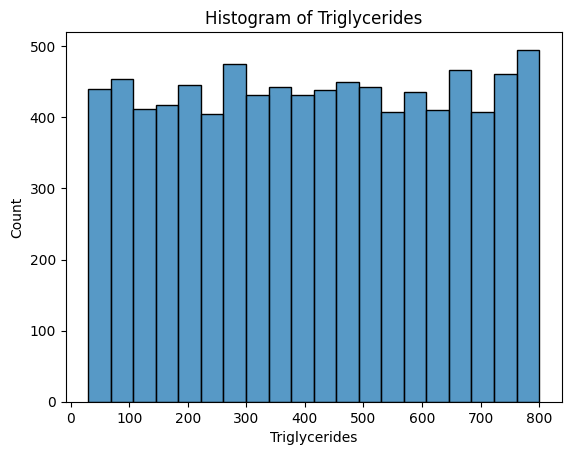

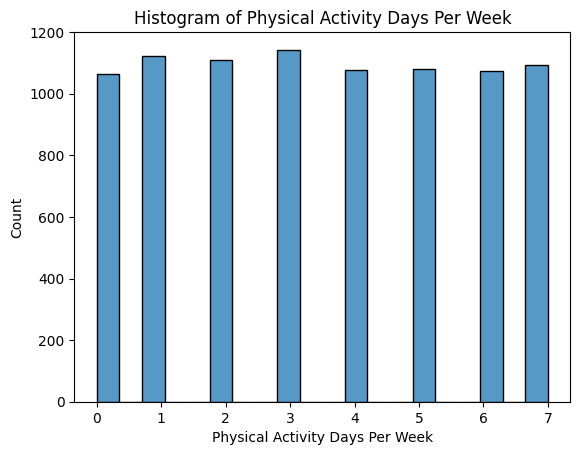

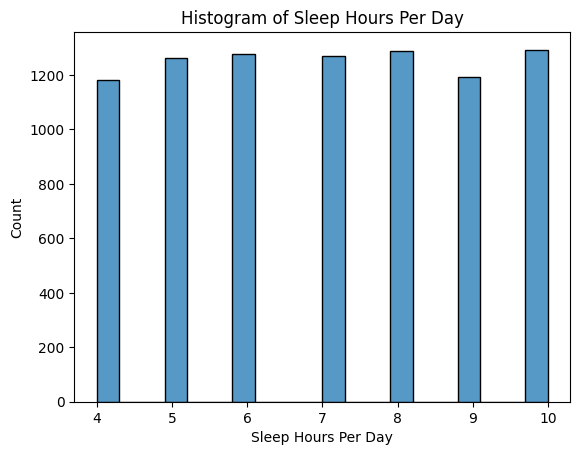

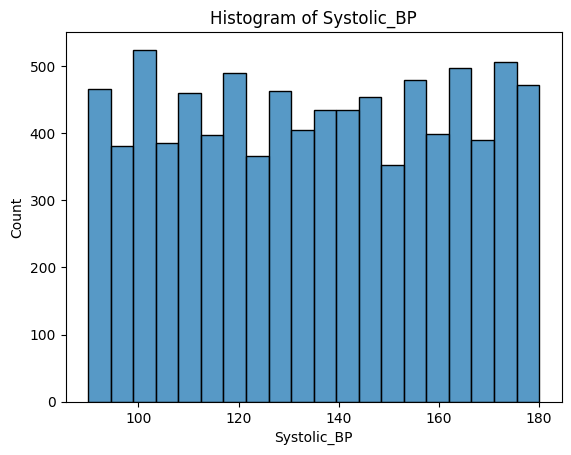

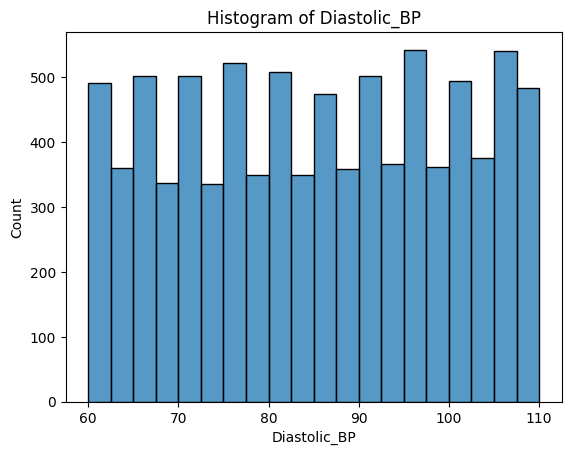

In [89]:
histogram_plot(df, numeric_columns)

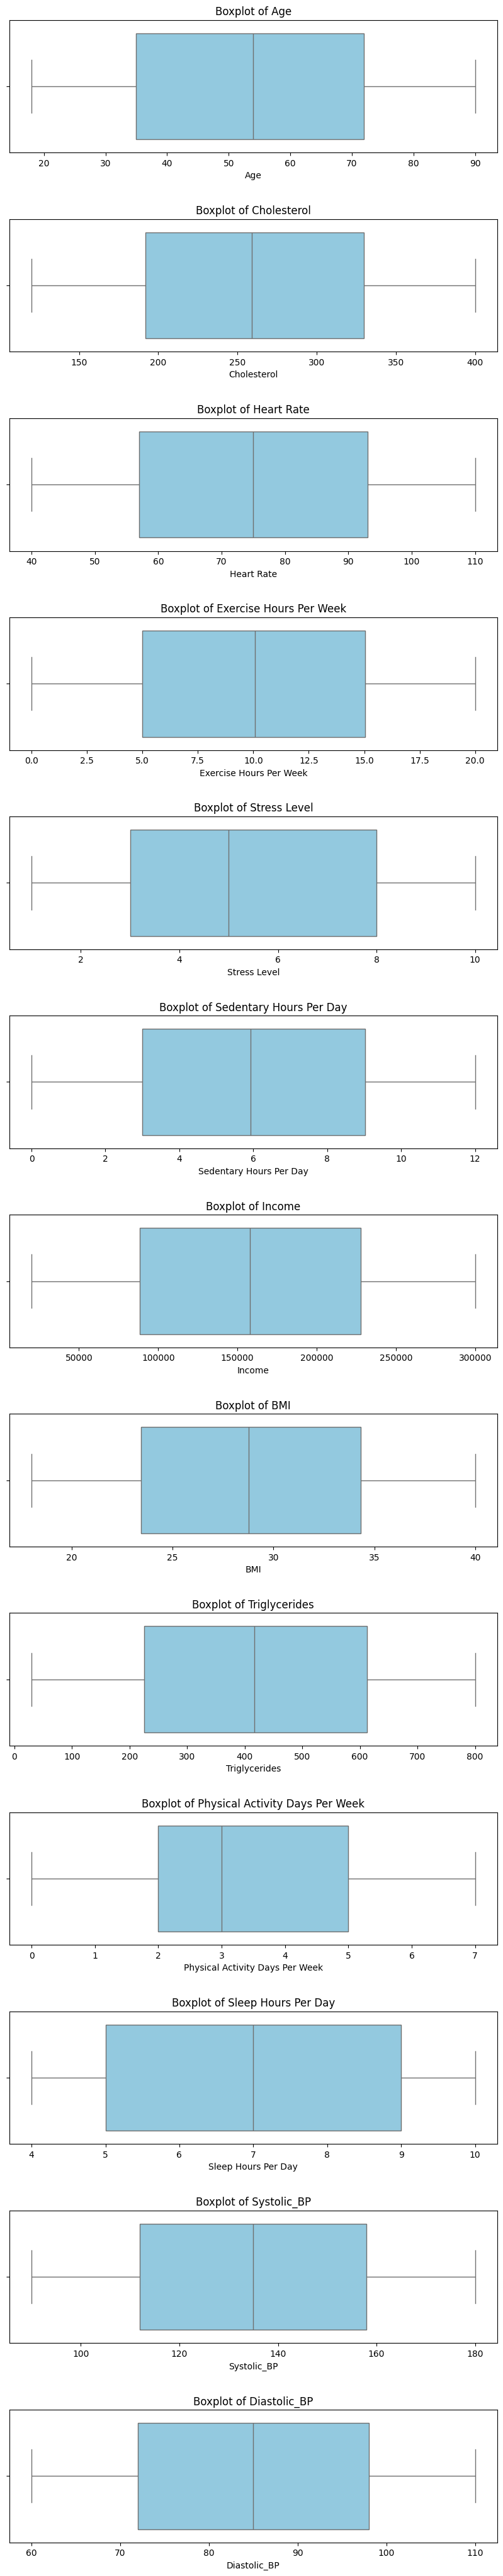

In [90]:
box_plot(df, numeric_columns)

**Range of Income is really different from the others, so normalization has benefit for it** 

In [91]:
# scale
scaler = MinMaxScaler(feature_range=(0,10))
df['Income'] = scaler.fit_transform(df[['Income']])

Also **heart rate** can be normalized because that other features are going to be transform in the following

In [92]:
df['Heart Rate'] = scaler.fit_transform(df[['Heart Rate']])

In [93]:
df

Patient ID  Age     Sex  Cholesterol  Heart Rate  Diabetes  \
0       BMW7812   67    Male          208    4.571429     False   
1       CZE1114   21    Male          389    8.285714      True   
2       BNI9906   21  Female          324    4.571429      True   
3       JLN3497   84    Male          383    4.714286      True   
4       GFO8847   66    Male          318    7.571429      True   
...         ...  ...     ...          ...         ...       ...   
8758    MSV9918   60    Male          121    3.000000      True   
8759    QSV6764   28  Female          120    4.714286      True   
8760    XKA5925   47    Male          250    9.285714     False   
8761    EPE6801   36    Male          178    2.857143      True   
8762    ZWN9666   25  Female          356    5.000000      True   

      Family History  Smoking  Obesity  Alcohol Consumption  \
0              False     True    False                False   
1               True     True     True                 True   
2              False    False    False                False   
3               True     True    False                 True   
4               True     True     True                False   
...              ...      ...      ...                  ...   
8758            True     True    False                 True   
8759           False    False     True                False   
8760            True     True     True                 True   
8761           False     True    False                False   
8762            True    False    False                 True   

      Exercise Hours Per Week       Diet  Previous Heart Problems  \
0                    4.168189    Average                    False   
1                    1.813242  Unhealthy                     True   
2                    2.078353    Healthy                     True   
3                    9.828130    Average                     True   
4                    5.804299  Unhealthy                     True   
...                       ...        ...                      ...   
8758                 7.917342    Healthy                     True   
8759                16.558426    Healthy                    False   
8760                 3.148438    Average                     True   
8761                 3.789950  Unhealthy                     True   
8762                18.081748    Healthy                    False   

      Medication Use  Stress Level  Sedentary Hours Per Day    Income  \
0              False             9                 6.615001  8.622683   
1              False             1                 4.963459  9.493162   
2               True             9                 9.463426  7.689394   
3              False             9                 7.648981  3.772098   
4              False             6                 1.514821  5.019543   
...              ...           ...                      ...       ...   
8758            True             8                10.806373  7.694325   
8759           False             8                 3.833038  7.067690   
8760           False             5                 2.375214  0.605091   
8761            True             5                 0.029104  6.784081   
8762           False             8                 9.005234  8.120132   

            BMI  Triglycerides  Physical Activity Days Per Week  \
0     31.251233            286                                0   
1     27.194973            235                                1   
2     28.176571            587                                4   
3     36.464704            378                                3   
4     21.809144            231                                1   
...         ...            ...                              ...   
8758  19.655895             67                                7   
8759  23.993866            617                                4   
8760  35.406146            527                                4   
8761  27.294020            114                                2   


## Outlier Detection

**By Z_Score**

In [94]:
def outlier_by_z(data, columns):
    z_scores = zscore(data[columns])
    ## z_score above 3 or less than -3 is considered outlier
    abs_z_scores = np.abs(z_scores)
    z_outliers = (abs_z_scores > 3).any(axis=1)
    return z_outliers

In [95]:
z_outliers = outlier_by_z(df, numeric_columns)

**analyze return values**

outlier_detection by z_scores. True shows number of outliers
 False    8763
Name: count, dtype: int64




([<matplotlib.axis.XTick at 0x2bd2dfba7a0>,
 [Text(0, 0, 'False'), Text(1, 0, 'True')])

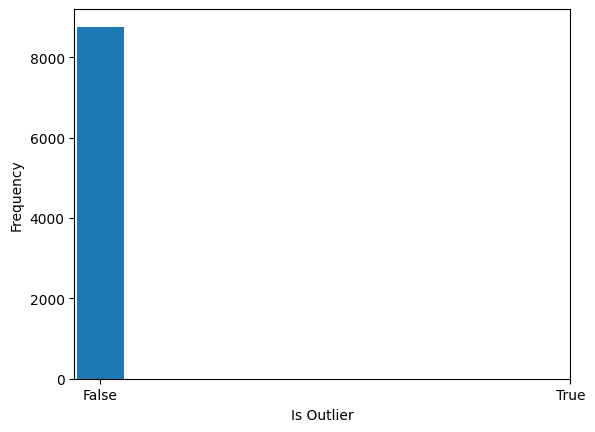

In [96]:
z_score_outlier_value_counts = z_outliers.value_counts()
print(f"outlier_detection by z_scores. True shows number of outliers\n {z_score_outlier_value_counts}\n\n")
plt.bar(z_score_outlier_value_counts.index, z_score_outlier_value_counts.values, width=0.1)
plt.xlabel('Is Outlier')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['False', 'True'])


No outliers detect by this method, let`s try another method:

In [97]:
def outlier_box_plot(data, columns):
   outliers = pd.DataFrame(index=data.index, columns=columns)
   num_outliers = 0
   for column in columns:
       Q1 = data[column].quantile(0.25)
       Q3 = data[column].quantile(0.75)
       IQR = Q3 - Q1
       lower_bound = Q1 - 1.5 * IQR
       upper_bound = Q3 + 1.5 * IQR
       is_outlier = (data[column] < lower_bound) | (data[column] > upper_bound)
       num_outliers += is_outlier.sum()
       outliers[column] = is_outlier
   return num_outliers, outliers

In [98]:
num_of_outliers, box_plot_outliers = outlier_box_plot(df, numeric_columns)

**analyze return values**


In [99]:
print(f"number_of_outliers defined by IQR is {num_of_outliers}")

number_of_outliers defined by IQR is 0


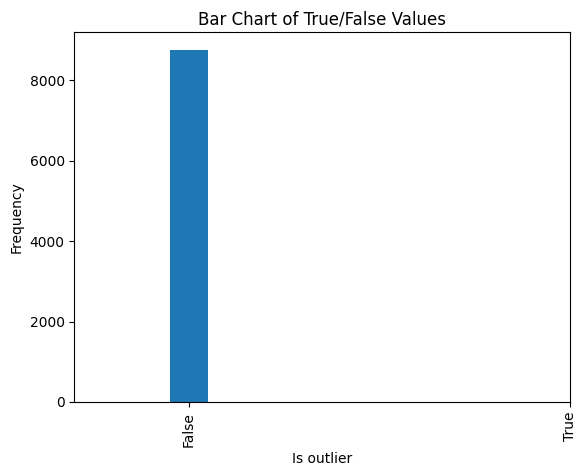

In [100]:
value_counts = box_plot_outliers[numeric_columns].value_counts()

# Plot a bar chart of the frequency of 'True' and 'False' values
value_counts.plot(kind='bar', width = 0.1)
plt.xlabel('Is outlier')
plt.ylabel('Frequency')
plt.title('Bar Chart of True/False Values')
plt.xticks([0, 1], ['False', 'True'])
plt.show()

**No outliers finds even with this method**

## Inconsistancy 

In [101]:
obesed_patients = df[df["Obesity"] == True]

In [102]:
obesed_patients[obesed_patients["BMI"] < 30]
## there must be above 30

Patient ID  Age     Sex  Cholesterol  Heart Rate  Diabetes  \
1       CZE1114   21    Male          389    8.285714      True   
4       GFO8847   66    Male          318    7.571429      True   
7       XXM0972   84    Male          220    9.571429     False   
9       FTJ5456   43  Female          248    2.142857     False   
16      DXB2434   69    Male          379    0.000000      True   
...         ...  ...     ...          ...         ...       ...   
8743    FPL5366   64  Female          338    5.571429      True   
8750    FDK8693   34  Female          304    7.571429     False   
8751    SVO4635   75    Male          176    5.428571     False   
8753    NVC8704   82    Male          311    6.714286     False   
8759    QSV6764   28  Female          120    4.714286      True   

      Family History  Smoking  Obesity  Alcohol Consumption  \
1               True     True     True                 True   
4               True     True     True                False   
7              False     True     True                 True   
9               True     True     True                 True   
16              True     True     True                 True   
...              ...      ...      ...                  ...   
8743            True     True     True                 True   
8750            True    False     True                 True   
8751           False     True     True                 True   
8753            True     True     True                 True   
8759           False    False     True                False   

      Exercise Hours Per Week       Diet  Previous Heart Problems  \
1                    1.813242  Unhealthy                     True   
4                    5.804299  Unhealthy                     True   
7                    3.427929    Average                    False   
9                    0.194515  Unhealthy                    False   
16                   4.184648    Average                     True   
...                       ...        ...                      ...   
8743                13.595200    Average                    False   
8750                 6.658321    Average                    False   
8751                18.382487    Healthy                    False   
8753                 8.202449  Unhealthy                     True   
8759                16.558426    Healthy                    False   

      Medication Use  Stress Level  Sedentary Hours Per Day    Income  \
1              False             1                 4.963459  9.493162   
4              False             6                 1.514821  5.019543   
7               True             4                10.543780  3.645370   
9              False             4                 4.055115  6.775506   
16             False             5                 9.060509  8.858238   
...              ...           ...                      ...       ...   
8743            True             6                 5.365595  2.457091   
8750           False            10                 6.900037  7.281809   
8751           False             3                 6.634988  7.429544   
8753           False             7                 8.402977  4.339495   
8759           False             8                 3.833038  7.067690   

            BMI  Triglycerides  Physical Activity Days Per Week  \
1     27.194973            235                                1   
4     21.809144            231                                1   
7     22.221862            370                                6   
9     22.558917            232                                7   
16    28.332747             68                                3   
...         ...            ...                              ...   
8743  25.534554             93                                6   
8750  22.418494            791                                4   
8751  23.793280            748                                5   
8753  27.694240            515                                1   


### Concept Hierarchy Generation

**Age**

In [103]:
## 0-12 child
## 13-19 teenager
## 20-35 young
## 36-50 middle age
## 51-100 old
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 19, 35, 50, 100], labels=['child', 'teenager', 'young', 'middle-age', 'old'])
df['BMI_Class'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal weight', 'Overweight', 'Obese'])

In [104]:
df

Patient ID  Age     Sex  Cholesterol  Heart Rate  Diabetes  \
0       BMW7812   67    Male          208    4.571429     False   
1       CZE1114   21    Male          389    8.285714      True   
2       BNI9906   21  Female          324    4.571429      True   
3       JLN3497   84    Male          383    4.714286      True   
4       GFO8847   66    Male          318    7.571429      True   
...         ...  ...     ...          ...         ...       ...   
8758    MSV9918   60    Male          121    3.000000      True   
8759    QSV6764   28  Female          120    4.714286      True   
8760    XKA5925   47    Male          250    9.285714     False   
8761    EPE6801   36    Male          178    2.857143      True   
8762    ZWN9666   25  Female          356    5.000000      True   

      Family History  Smoking  Obesity  Alcohol Consumption  \
0              False     True    False                False   
1               True     True     True                 True   
2              False    False    False                False   
3               True     True    False                 True   
4               True     True     True                False   
...              ...      ...      ...                  ...   
8758            True     True    False                 True   
8759           False    False     True                False   
8760            True     True     True                 True   
8761           False     True    False                False   
8762            True    False    False                 True   

      Exercise Hours Per Week       Diet  Previous Heart Problems  \
0                    4.168189    Average                    False   
1                    1.813242  Unhealthy                     True   
2                    2.078353    Healthy                     True   
3                    9.828130    Average                     True   
4                    5.804299  Unhealthy                     True   
...                       ...        ...                      ...   
8758                 7.917342    Healthy                     True   
8759                16.558426    Healthy                    False   
8760                 3.148438    Average                     True   
8761                 3.789950  Unhealthy                     True   
8762                18.081748    Healthy                    False   

      Medication Use  Stress Level  Sedentary Hours Per Day    Income  \
0              False             9                 6.615001  8.622683   
1              False             1                 4.963459  9.493162   
2               True             9                 9.463426  7.689394   
3              False             9                 7.648981  3.772098   
4              False             6                 1.514821  5.019543   
...              ...           ...                      ...       ...   
8758            True             8                10.806373  7.694325   
8759           False             8                 3.833038  7.067690   
8760           False             5                 2.375214  0.605091   
8761            True             5                 0.029104  6.784081   
8762           False             8                 9.005234  8.120132   

            BMI  Triglycerides  Physical Activity Days Per Week  \
0     31.251233            286                                0   
1     27.194973            235                                1   
2     28.176571            587                                4   
3     36.464704            378                                3   
4     21.809144            231                                1   
...         ...            ...                              ...   
8758  19.655895             67                                7   
8759  23.993866            617                                4   
8760  35.406146            527                                4   
8761  27.294020            114                                2   


In [105]:
gender_map = {'Male': 1, 'Female': 0}
diet_map = {"Healthy": 0, "Average":1, "Unhealthy":2}
age_map = {'child': 0, 'teenager': 1, 'young': 2, 'middle-age': 3 , 'old': 4}
bmi_map = {'Underweight': 0, 'Normal weight':1, 'Overweight':2, 'Obese':3}
encoded_df = df
# Use the map function to encode BMI categories
encoded_df['BMI_Class'] = encoded_df['BMI_Class'].map(bmi_map)
encoded_df['AgeGroup'] = encoded_df['AgeGroup'].map(age_map)
encoded_df['Diet'] = encoded_df['Diet'].map(diet_map)
encoded_df['Sex'] = encoded_df['Sex'].map(gender_map)
encoded_df = encoded_df.replace({True: 1, False: 0})

In [106]:
encoded_df

Patient ID  Age  Sex  Cholesterol  Heart Rate  Diabetes  Family History  \
0       BMW7812   67    1          208    4.571429         0               0   
1       CZE1114   21    1          389    8.285714         1               1   
2       BNI9906   21    0          324    4.571429         1               0   
3       JLN3497   84    1          383    4.714286         1               1   
4       GFO8847   66    1          318    7.571429         1               1   
...         ...  ...  ...          ...         ...       ...             ...   
8758    MSV9918   60    1          121    3.000000         1               1   
8759    QSV6764   28    0          120    4.714286         1               0   
8760    XKA5925   47    1          250    9.285714         0               1   
8761    EPE6801   36    1          178    2.857143         1               0   
8762    ZWN9666   25    0          356    5.000000         1               1   

      Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  Diet  \
0           1        0                    0                 4.168189     1   
1           1        1                    1                 1.813242     2   
2           0        0                    0                 2.078353     0   
3           1        0                    1                 9.828130     1   
4           1        1                    0                 5.804299     2   
...       ...      ...                  ...                      ...   ...   
8758        1        0                    1                 7.917342     0   
8759        0        1                    0                16.558426     0   
8760        1        1                    1                 3.148438     1   
8761        1        0                    0                 3.789950     2   
8762        0        0                    1                18.081748     0   

      Previous Heart Problems  Medication Use  Stress Level  \
0                           0               0             9   
1                           1               0             1   
2                           1               1             9   
3                           1               0             9   
4                           1               0             6   
...                       ...             ...           ...   
8758                        1               1             8   
8759                        0               0             8   
8760                        1               0             5   
8761                        1               1             5   
8762                        0               0             8   

      Sedentary Hours Per Day    Income        BMI  Triglycerides  \
0                    6.615001  8.622683  31.251233            286   
1                    4.963459  9.493162  27.194973            235   
2                    9.463426  7.689394  28.176571            587   
3                    7.648981  3.772098  36.464704            378   
4                    1.514821  5.019543  21.809144            231   
...                       ...       ...        ...            ...   
8758                10.806373  7.694325  19.655895             67   
8759                 3.833038  7.067690  23.993866            617   
8760                 2.375214  0.605091  35.406146            527   
8761                 0.029104  6.784081  27.294020            114   
8762                 9.005234  8.120132  32.914151            180   

      Physical Activity Days Per Week  Sleep Hours Per Day         Country  \
0                                   0                    6       Argentina   
1                                   1                    7          Canada   
2                                   4                    4          France   
3                                   3                    4          Canada   
4                                   1                    5        Thailand   
...                               ...                

## Generate new features

In [107]:
numeric_columns = df.select_dtypes(include=['int64','float64']).columns
encoded_df.describe()

Age          Sex  Cholesterol   Heart Rate     Diabetes  \
count  8763.000000  8763.000000  8763.000000  8763.000000  8763.000000   
mean     53.707977     0.697364   259.877211     5.003097     0.652288   
std      21.249509     0.459425    80.863276     2.935850     0.476271   
min      18.000000     0.000000   120.000000     0.000000     0.000000   
25%      35.000000     0.000000   192.000000     2.428571     0.000000   
50%      54.000000     1.000000   259.000000     5.000000     1.000000   
75%      72.000000     1.000000   330.000000     7.571429     1.000000   
max      90.000000     1.000000   400.000000    10.000000     1.000000   

       Family History      Smoking      Obesity  Alcohol Consumption  \
count     8763.000000  8763.000000  8763.000000          8763.000000   
mean         0.492982     0.896839     0.501426             0.598083   
std          0.499979     0.304186     0.500026             0.490313   
min          0.000000     0.000000     0.000000             0.000000   
25%          0.000000     1.000000     0.000000             0.000000   
50%          0.000000     1.000000     1.000000             1.000000   
75%          1.000000     1.000000     1.000000             1.000000   
max          1.000000     1.000000     1.000000             1.000000   

       Exercise Hours Per Week         Diet  Previous Heart Problems  \
count              8763.000000  8763.000000              8763.000000   
mean                 10.014284     0.992126                 0.495835   
std                   5.783745     0.817134                 0.500011   
min                   0.002442     0.000000                 0.000000   
25%                   4.981579     0.000000                 0.000000   
50%                  10.069559     1.000000                 0.000000   
75%                  15.050018     2.000000                 1.000000   
max                  19.998709     2.000000                 1.000000   

       Medication Use  Stress Level  Sedentary Hours Per Day       Income  \
count     8763.000000   8763.000000              8763.000000  8763.000000   
mean         0.498345      5.469702                 5.993690     4.937661   
std          0.500026      2.859622                 3.466359     2.878796   
min          0.000000      1.000000                 0.001263     0.000000   
25%          0.000000      3.000000                 2.998794     2.438369   
50%          0.000000      5.000000                 5.933622     4.923470   
75%          1.000000      8.000000                 9.019124     7.420255   
max          1.000000     10.000000                11.999313    10.000000   

               BMI  Triglycerides  Physical Activity Days Per Week  \
count  8763.000000    8763.000000                      8763.000000   
mean     28.891446     417.677051                         3.489672   
std       6.319181     223.748137                         2.282687   
min      18.002337      30.000000                         0.000000   
25%      23.422985     225.500000                         2.000000   
50%      28.768999     417.000000                         3.000000   
75%      34.324594     612.000000                         5.000000   
max      39.997211     800.000000                         7.000000   

       Sleep Hours Per Day  Heart Attack Risk  Systolic_BP  Diastolic_BP  
count          8763.000000        8763.000000  8763.000000   8763.000000  
mean              7.023508           0.358211   135.075659     85.156111  
std               1.988473           0.479502    26.349976     14.676565  
min               4.000000           0.000000    90.000000     60.000000  
25%               5.000000           0.000000   112.000000     72.000000  
50%               7.000000           0.000000   135.000000     85.000000  
75%               9.000000           1.000000   158.000000     98.000000  
max              10.000000           1.000000   180.000000    110.000000

In [108]:
correlations_df = pd.DataFrame(encoded_df.corr(numeric_only=True, method = "pearson")['Heart Attack Risk'])
correlations_df

Heart Attack Risk
Age                                       0.006403
Sex                                       0.003095
Cholesterol                               0.019340
Heart Rate                               -0.004251
Diabetes                                  0.017225
Family History                           -0.001652
Smoking                                  -0.004051
Obesity                                  -0.013318
Alcohol Consumption                      -0.013778
Exercise Hours Per Week                   0.011133
Diet                                     -0.005908
Previous Heart Problems                   0.000274
Medication Use                            0.002234
Stress Level                             -0.004111
Sedentary Hours Per Day                  -0.005613
Income                                    0.009628
BMI                                       0.000020
Triglycerides                             0.010471
Physical Activity Days Per Week          -0.005014
Sleep Hours Per Day                      -0.018528
Heart Attack Risk                         1.000000
Systolic_BP                               0.018585
Diastolic_BP                             -0.007509

In [109]:
def correlation(dataframe, feature_name, target_name):
    correlation = dataframe[feature_name].corr(dataframe[target_name])
    print(f"Correlation between {feature_name} and {target_name}: {correlation}")
    # scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(dataframe[feature_name], dataframe[target_name], alpha=0.5)
    plt.title(f"Scatter Plot of {feature_name} vs {target_name}")
    plt.xlabel(feature_name)
    plt.ylabel(target_name)
    plt.grid(True)
    plt.show()

    return correlation

**Life Style Risk**

In [110]:
life_style_score = (encoded_df['Smoking'] + encoded_df['Alcohol Consumption'] + (encoded_df["Diet"]/2) + encoded_df["Stress Level"]/10 - (encoded_df["Exercise Hours Per Week"]/20))/4
life_style_score = life_style_score.apply(lambda x: max(x, 0))
encoded_df['Life Style Risk'] = life_style_score
life_style_score.describe()

count    8763.000000
mean        0.509965
std         0.202301
min         0.000000
25%         0.368782
50%         0.518576
75%         0.654317
max         0.999907
dtype: float64

In [112]:
encoded_df[['Life Style Risk',"Heart Attack Risk"]].corr(method='pearson')

Life Style Risk  Heart Attack Risk
Life Style Risk           1.000000          -0.018569
Heart Attack Risk        -0.018569           1.000000

**Heart Problem History**

In [114]:
heart_problem_history = (0.4 * encoded_df['Family History'] + 0.6 * encoded_df['Previous Heart Problems'] )/ 2
encoded_df['Heart Problem History'] = heart_problem_history
heart_problem_history.describe()

count    8763.000000
mean        0.247347
std         0.179898
min         0.000000
25%         0.000000
50%         0.200000
75%         0.300000
max         0.500000
dtype: float64

In [115]:
Triglycerides_Cholesterol_Ratio = (encoded_df['Triglycerides'] / encoded_df['Cholesterol'] )
encoded_df['Triglycerides_Cholesterol_Ratio'] = Triglycerides_Cholesterol_Ratio
Triglycerides_Cholesterol_Ratio.describe()

count    8763.000000
mean        1.799000
std         1.212122
min         0.078740
25%         0.863310
50%         1.606322
75%         2.440199
max         6.550000
dtype: float64

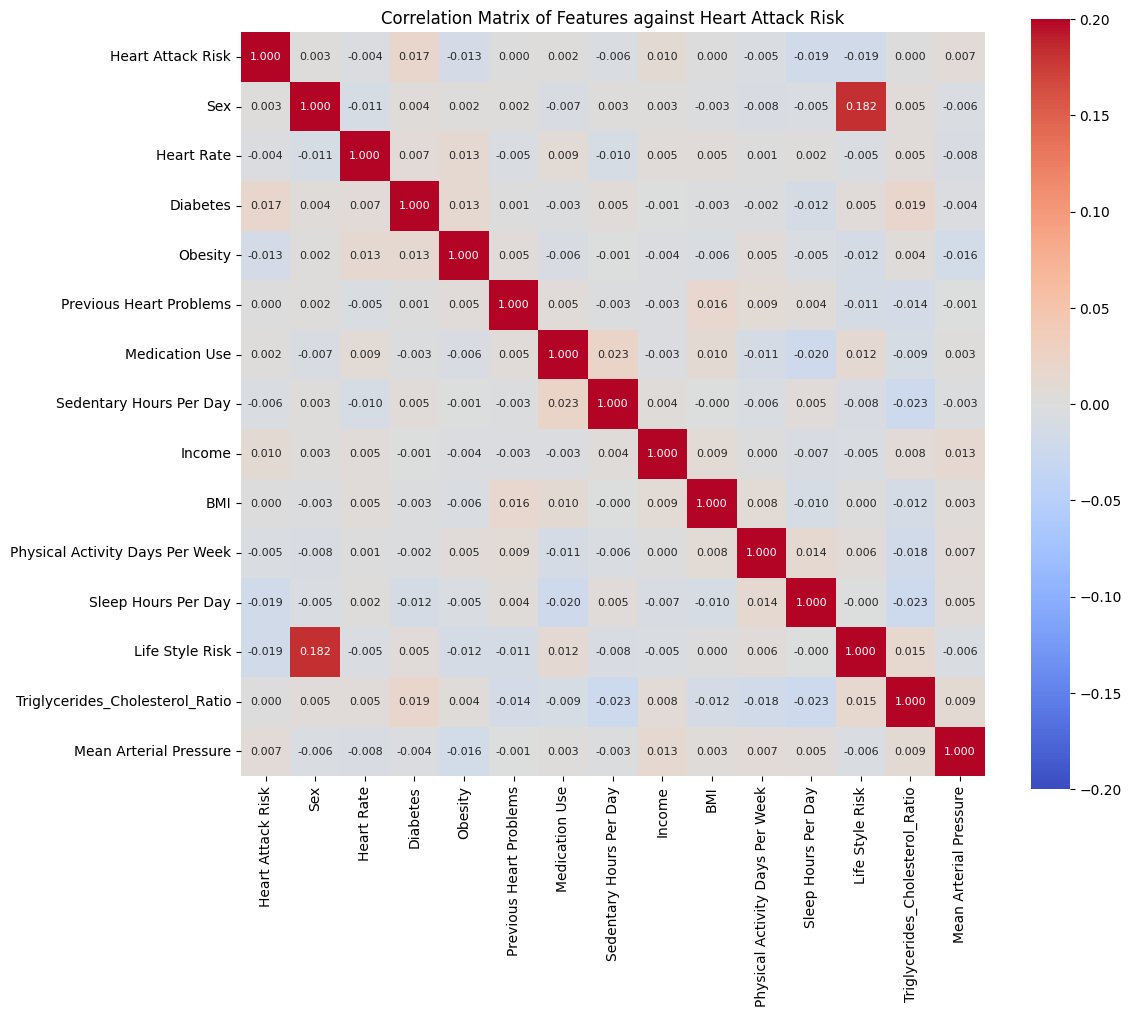

In [173]:
# Move heart attack column to first column
cols = encoded_df.columns.tolist()
cols = ['Heart Attack Risk'] + [col for col in cols if col != 'Heart Attack Risk']
temp_encoded_df = encoded_df[cols]

# calculate the correlations
correlation_matrix = temp_encoded_df.corr(numeric_only=True, method = "pearson")
correlation_target = correlation_matrix['Heart Attack Risk'].sort_values(ascending=False)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin= - 0.2, vmax = 0.2, annot_kws={"size": 8, "ha": 'center', "va": 'center'}, fmt='.3f', square = True)
plt.title('Correlation Matrix of Features against Heart Attack Risk')
plt.show()

In [111]:
# pair = ("Life Style Risk", "Heart Attack Risk")
# contingency_table = pd.crosstab(encoded_df[pair[0]],encoded_df[pair[1]])
# phi_coefficient = np.sqrt(contingency_table.div(contingency_table.sum(axis=1), axis=0).div(contingency_table.sum(axis=0), axis=1).values).ravel()[1]

# # Print the phi coefficient
# print(f"Correlation of {pair} by Phi Coefficient: {phi_coefficient}")


In [116]:
encoded_df

Patient ID  Age  Sex  Cholesterol  Heart Rate  Diabetes  Family History  \
0       BMW7812   67    1          208    4.571429         0               0   
1       CZE1114   21    1          389    8.285714         1               1   
2       BNI9906   21    0          324    4.571429         1               0   
3       JLN3497   84    1          383    4.714286         1               1   
4       GFO8847   66    1          318    7.571429         1               1   
...         ...  ...  ...          ...         ...       ...             ...   
8758    MSV9918   60    1          121    3.000000         1               1   
8759    QSV6764   28    0          120    4.714286         1               0   
8760    XKA5925   47    1          250    9.285714         0               1   
8761    EPE6801   36    1          178    2.857143         1               0   
8762    ZWN9666   25    0          356    5.000000         1               1   

      Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  Diet  \
0           1        0                    0                 4.168189     1   
1           1        1                    1                 1.813242     2   
2           0        0                    0                 2.078353     0   
3           1        0                    1                 9.828130     1   
4           1        1                    0                 5.804299     2   
...       ...      ...                  ...                      ...   ...   
8758        1        0                    1                 7.917342     0   
8759        0        1                    0                16.558426     0   
8760        1        1                    1                 3.148438     1   
8761        1        0                    0                 3.789950     2   
8762        0        0                    1                18.081748     0   

      Previous Heart Problems  Medication Use  Stress Level  \
0                           0               0             9   
1                           1               0             1   
2                           1               1             9   
3                           1               0             9   
4                           1               0             6   
...                       ...             ...           ...   
8758                        1               1             8   
8759                        0               0             8   
8760                        1               0             5   
8761                        1               1             5   
8762                        0               0             8   

      Sedentary Hours Per Day    Income        BMI  Triglycerides  \
0                    6.615001  8.622683  31.251233            286   
1                    4.963459  9.493162  27.194973            235   
2                    9.463426  7.689394  28.176571            587   
3                    7.648981  3.772098  36.464704            378   
4                    1.514821  5.019543  21.809144            231   
...                       ...       ...        ...            ...   
8758                10.806373  7.694325  19.655895             67   
8759                 3.833038  7.067690  23.993866            617   
8760                 2.375214  0.605091  35.406146            527   
8761                 0.029104  6.784081  27.294020            114   
8762                 9.005234  8.120132  32.914151            180   

      Physical Activity Days Per Week  Sleep Hours Per Day         Country  \
0                                   0                    6       Argentina   
1                                   1                    7          Canada   
2                                   4                    4          France   
3                                   3                    4          Canada   
4                                   1                    5        Thailand   
...                               ...                

## Data Reduction

Continent and Hemisphere are derivable of Country, So we do not need them straightly

In [117]:
encoded_df.drop(['Continent', 'Hemisphere'], axis=1, inplace = True)

Age has been modified by ['child', 'teenager', 'young', 'middle-age', 'old'], so we can omit the column

In [118]:
encoded_df.drop(['Age'], axis=1, inplace = True)

Make Blood Pressure characterestic to one

In [119]:
encoded_df['Mean Arterial Pressure'] = (1/3) * encoded_df['Systolic_BP'] + (2/3) * encoded_df['Diastolic_BP']

In [120]:
encoded_df.drop(['Systolic_BP', 'Diastolic_BP'], axis=1, inplace = True)

Triglycerides and Cholesterol ratio is one of the features extract in medical manners. instead of each separately we combine them.
So they can be omited

In [121]:
encoded_df.drop(['Cholesterol', 'Triglycerides'], axis=1, inplace = True)

BMI and State of patient`s body is declared by the BMI levels, So we can omit the BMI value and Obese from the dataset

In [56]:
encoded_df.drop(['Obesity', 'BMI'], axis=1, inplace = True)

We combined features 'Smoking', 'Alcohol Consumption', 'Diet', 'Stress_level', 'Exercise Hours Per Week' as one feature, so we can omit them

In [123]:
encoded_df.drop(['Smoking', 'Alcohol Consumption', 'Diet', 'Stress Level', 'Exercise Hours Per Week'], axis=1, inplace = True)

We combined features 'Family History', 'Heart Problem History' as one feature, so we can omit them

In [124]:
encoded_df.drop(['Family History', 'Heart Problem History'], axis=1, inplace = True)

In [125]:
encoded_df

Patient ID  Sex  Heart Rate  Diabetes  Obesity  Previous Heart Problems  \
0       BMW7812    1    4.571429         0        0                        0   
1       CZE1114    1    8.285714         1        1                        1   
2       BNI9906    0    4.571429         1        0                        1   
3       JLN3497    1    4.714286         1        0                        1   
4       GFO8847    1    7.571429         1        1                        1   
...         ...  ...         ...       ...      ...                      ...   
8758    MSV9918    1    3.000000         1        0                        1   
8759    QSV6764    0    4.714286         1        1                        0   
8760    XKA5925    1    9.285714         0        1                        1   
8761    EPE6801    1    2.857143         1        0                        1   
8762    ZWN9666    0    5.000000         1        0                        0   

      Medication Use  Sedentary Hours Per Day    Income        BMI  \
0                  0                 6.615001  8.622683  31.251233   
1                  0                 4.963459  9.493162  27.194973   
2                  1                 9.463426  7.689394  28.176571   
3                  0                 7.648981  3.772098  36.464704   
4                  0                 1.514821  5.019543  21.809144   
...              ...                      ...       ...        ...   
8758               1                10.806373  7.694325  19.655895   
8759               0                 3.833038  7.067690  23.993866   
8760               0                 2.375214  0.605091  35.406146   
8761               1                 0.029104  6.784081  27.294020   
8762               0                 9.005234  8.120132  32.914151   

      Physical Activity Days Per Week  Sleep Hours Per Day         Country  \
0                                   0                    6       Argentina   
1                                   1                    7          Canada   
2                                   4                    4          France   
3                                   3                    4          Canada   
4                                   1                    5        Thailand   
...                               ...                  ...             ...   
8758                                7                    7        Thailand   
8759                                4                    9          Canada   
8760                                4                    4          Brazil   
8761                                2                    8          Brazil   
8762                                7                    4  United Kingdom   

      Heart Attack Risk AgeGroup BMI_Class  Life Style Risk  \
0                     0        4         3         0.547898   
1                     0        2         2         0.752334   
2                     0        2         2         0.199021   
3                     0        4         3         0.727148   
4                     0        4         1         0.577446   
...                 ...      ...       ...              ...   
8758                  0        4         1         0.601033   
8759                  0        2         1         0.000000   
8760                  1        3         3         0.710645   
8761                  0        3         2         0.577626   
8762                  1        2         3         0.223978   

      Triglycerides_Cholesterol_Ratio  Mean Arterial Pressure  
0                            1.375000              111.333333  
1                            0.604113              117.000000  
2                            1.811728              124.000000  
3                            0.986945              121.000000  
4                            0.726415               89.000000  
...                               ...                     ...  
8758                         0.553719               82.000000

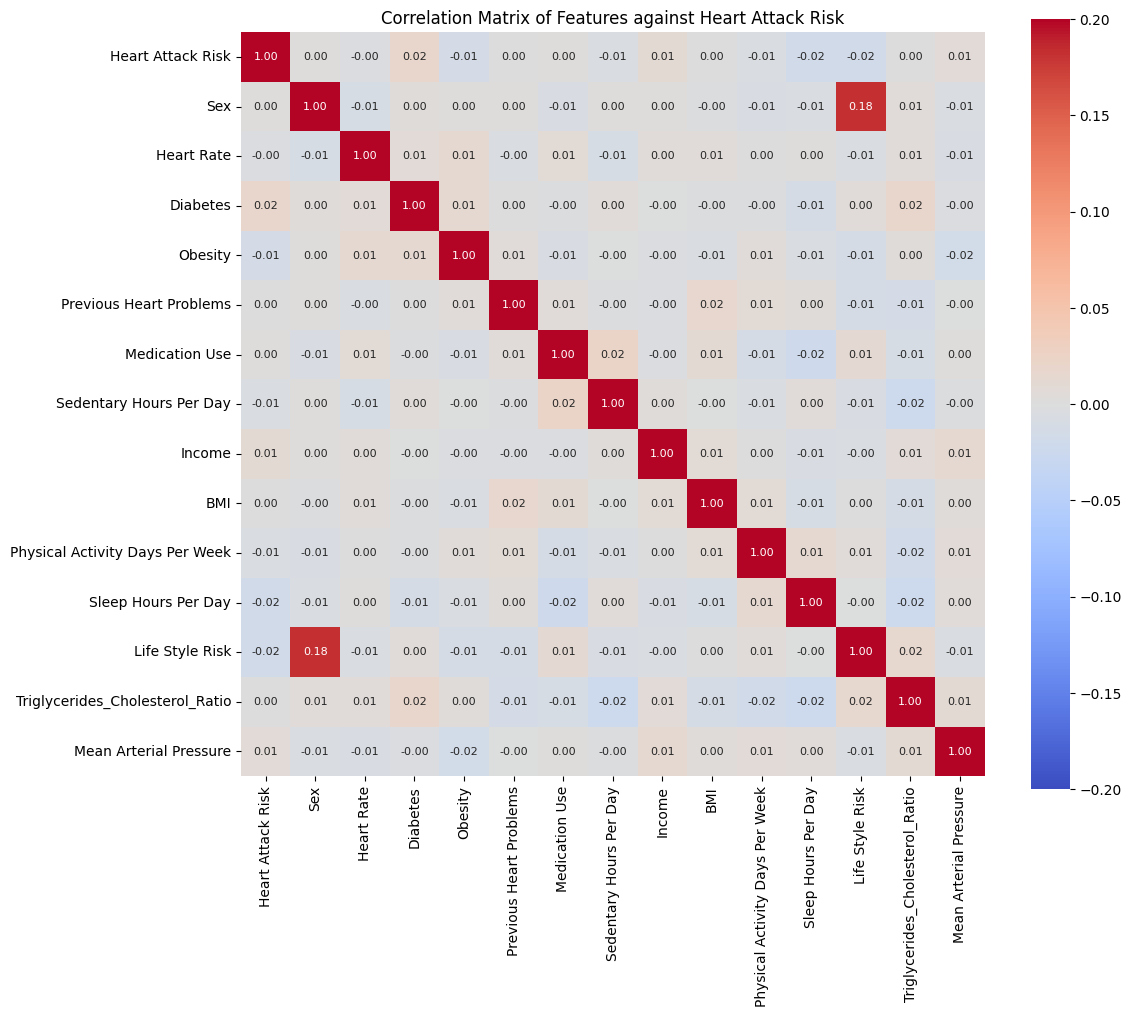

In [174]:
# Move heart attack column to first column
cols = encoded_df.columns.tolist()
cols = ['Heart Attack Risk'] + [col for col in cols if col != 'Heart Attack Risk']
temp_encoded_df = encoded_df[cols]

# calculate the correlations
correlation_matrix = temp_encoded_df.corr(numeric_only=True, method = "pearson")
correlation_target = correlation_matrix['Heart Attack Risk'].sort_values(ascending=False)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',vmin= - 0.2, vmax = 0.2, annot_kws={"size": 8, "ha": 'center', "va": 'center'}, fmt='.2f', square = True)
plt.title('Correlation Matrix of Features against Heart Attack Risk')
plt.show()

For model input the Patient-ID must be deleted and countries must be encoded